In [2]:
import matplotlib.font_manager as font_manager
import matplotlib.dates as matdates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.colors as cl
from os.path import expanduser
import matplotlib as mpl
import seaborn as sns
import itertools

sns.set_style("ticks")
fontpath = expanduser('~/.local/share/fonts/LinLibertine_DRah.ttf')
prop = font_manager.FontProperties(fname=fontpath)

params = {
    "axes.titlesize" : 16,
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': prop.get_name(),
    'text.usetex': True
}
mpl.rcParams.update(params)

In [3]:
# Read channels
from helpers import bins_y_s, bins_t_s, colors, mean_confidence_interval
from sqlitedict import SqliteDict
import matplotlib.colors as cl
import networkx as nx
import pandas as pd
import numpy as np
import glob

SRC = "/home/manoelribeiro/Dropbox/data/youtube_radicalization/"
cats = ["Alt-right", "Alt-lite", "Intellectual Dark Web", "Control"]
cats_all = ["Alt-right", "Alt-lite", "Intellectual Dark Web", "left",
            "center", "left-center", "right-center", "right"]
cats_to_control = ["left", "center", "left-center", "right-center", "right"]
df_sources = pd.read_csv(SRC + "/sources_final_trimmed.csv")
df_sources.Category = df_sources.Category.apply(lambda x: x if x not in cats_to_control else "Control")
df_sources = df_sources.set_index("Id")

In [17]:
channels = {}
G = nx.DiGraph()
G.add_node("Other", category="Other", subscriberCount=0)

helper_dict = {}
helper_nodes = {}

for channel_id, tmp in df_sources.iterrows():
    tmp = dict(tmp)
    if tmp["Category"] not in cats:
        continue
        
    # Reads metadata from youtube data
    df_tmp = pd.read_csv(SRC + "/yt/{}.csv".format(channel_id))
    helper_nodes[channel_id] = []
    for v in df_tmp["video_id"].values:
        helper_dict[v] = channel_id

for channel_id, tmp in df_sources.iterrows():
    if tmp["Category"] not in cats:
        continue
    
    G.add_node(channel_id, name=tmp["Name"], category=tmp["Category"])

count = 0
for v in glob.glob(SRC + "/vd/*/*.csv"):
    channel_id = v.split("/")[-1][:-4]
    
    if channel_id not in helper_nodes:
        continue
        
    try:
        df_tmp = pd.read_csv(v)
    except:
        continue

    for _, tmp in df_tmp.iterrows():
        tmp = dict(tmp)
        for vd_id, _, _ in eval(tmp["recommendations"])[:10]:

            if vd_id in helper_dict:# and helper_dict[vd_id] != channel_id:
                count += 1
                helper_nodes[channel_id].append(helper_dict[vd_id])
            elif vd_id not in helper_dict:
                count += 1
                helper_nodes[channel_id].append("Other")

    print(v)
    print(count)

from collections import Counter
for cid in helper_nodes.keys():
    clen = len(helper_nodes[cid])
    edges_dict = {k:i/clen for k, i in Counter(helper_nodes[cid]).items()}
    for ocid, pct in edges_dict.items():
        G.add_edge(cid, ocid, pct=pct)
        
nx.write_graphml(G, SRC+ "/video_graph.graphml")

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCZeP6H2mELnRI9imY5Iga0g.csv
1990
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCzp8QlVd_hDLfK1LMLDu3dQ.csv
13820
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCbukZErY9SjdGTHabMzY7qg.csv
15520
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCZmn5TswQ0m13ihKsbJ8Wzw.csv
16160
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCla6APLHX6W3FeNLc8PYuvg.csv
17530
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCUOn7uOg8vTCufzS9Nc5jFQ.csv
21790
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCpJykKGRQ4601DzVkkGk7bA.csv
21990
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCqLj_VGACwmDa0FZ4UV3j-w.csv
30250
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/U

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCsD-Qms-AkXDrsU962OicLw.csv
476181
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCFc0stDRUkeBDc36qZeox1g.csv
478731
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UClQkOIf9OfMCQ4CjlSSPvbQ.csv
480831
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UC3eWseER6XOMR6RcwcIJ23A.csv
480831
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCzk08fzh5c_BhjQa1w35wtA.csv
480991
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCHd62-u_v4DvJ8TCFtpi4GA.csv
580401
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UC6EyGxVgmTGt27_U9c_oz9g.csv
581161
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCFVabwlhdsTGiqOgCEZyUXg.csv
581681
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_1

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UC0rZoXAD5lxgBHMsjrGwWWQ.csv
1527277
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UClEDJq5JqDRGo8u8_lYO4gw.csv
1587977
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCW5BbfOqiBPIf_SZOe85Wjg.csv
1588947
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCZtDKD0pFpPclXA7ZAti90w.csv
1591837
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCvX0YZy3iET81JImRRKnAfQ.csv
1592807
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCRa_kxWOnJsSSb7S0ijguBw.csv
1593047
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCabMx-URCjr2toe9wOE3Y-Q.csv
1600407
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCP9oVEmpxbxmHd1_s3w6wTw.csv
1601067
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCnQC_G5Xsjhp9fEJKuIcrSw.csv
2253163
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UC4GzVIbK8bria6AOy43hY4Q.csv
2253853
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCOtFVJUoek4TKZAaeQVhiLA.csv
2254593
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UC8RJExf7iNpV6tp6hvNtwww.csv
2261813
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCSecgeLcJ6qXmE-tgOMYM1Q.csv
2267093
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCT9D87j5W7PtE7NHOR5DUOQ.csv
2282833
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCSTy-H5lSiCcozas32sfJlQ.csv
2282833
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCgkZARt0VNW7WKS5DOg8sDA.csv
2284533
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCLH7qUqM0PLieCVaHA7RegA.csv
2931611
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCIKAZwaFnH_QX1ddYDQf-lg.csv
2935161
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UC0uVZd8N7FfIZnPu0y7o95A.csv
2961571
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCYGnmkFGP4EgAOqu58JA_lg.csv
2971791
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCySf1uJJxjMDryRywEzUR2w.csv
2974731
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UC6wdP5hTf_phre6Q3kFiV2g.csv
2974731
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UCao3EH2t9wOFPmu2F4i4bag.csv
2974851
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_08_14_58_13/UC8Ioh4atNDO5a0Vy2qFmauQ.csv
2976281
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCx2HcmpB-UZGkMXOCJ4QIVA.csv
3511337
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UC92qENDvlCKpNCkUwJnFdkA.csv
3511777
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCZWlSUNDvCCS1hBiXV0zKcA.csv
3517747
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCsJ86N5n7fcEC_Ds8dYJKzA.csv
3517747
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCZMoAfVZKRS2HKA_gTPQY0g.csv
3521847
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCIsbLox_y9dCIMLd8tdC6qg.csv
3541597
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCq44SkRjuB4EOO-1pfOJzzA.csv
3542387
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCjoF4jS4oR479_Y2y9Oksbg.csv
3547007
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCyQsQSKayfcZoHaCjqxxSlg.csv
4068000
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCtD9a-aXIYS6-e-8s7DISiw.csv
4069980
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCx-h2AWPCBJEqzH9HXe2ZIA.csv
4161410
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCDuIxfEt_VoI1yfARYmfCGA.csv
4164580
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCtLAZi2CZmDgwgQ51XpqcDQ.csv
4165540
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCyhEZKz-LOwgktptEOh6_Iw.csv
4171280
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCzQUP1qoWDoEbmsQxvdjxgQ.csv
4193610
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCyZVnp-_owuoPlzNJNtaxZQ.csv
4194870
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCabMx-URCjr2toe9wOE3Y-Q.csv
5076185
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCP9oVEmpxbxmHd1_s3w6wTw.csv
5076845
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCWo4IA01TXzBeGJJKWHOG9g.csv
5079485
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UC9E2GVCdoEQGd1MN-JRkjNw.csv
5080415
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCPGxwlhPEJE89bT4gB6rzhg.csv
5083215
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCLM6JlQkQ9tltBL9Bipci9g.csv
5083825
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCxBZXHQ2aTr8Bdw8s5ZY4xQ.csv
5086145
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UC-jlxuVAVEl2PXTaGno7gSA.csv
5088855
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCJEDFSxHHOW1PpBccdSxOTA.csv
5848387
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCdf14z6V0MWNeVcbAz0r8wQ.csv
5850037
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCb062gdTsC6FPvnzCPVvsTw.csv
5852597
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UC5c-JkKHb0YxFZ81XBtFCmw.csv
5858037
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCWCtoOXSwTcbVjOiK8iFGUg.csv
5859677
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCioON-JvOyXE-aZ2-UCBqDw.csv
5859877
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCoUxsWakJucWg46KW5RsvPw.csv
5941297
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCcAhXQl-YWTU9wzfm5R5t7g.csv
5941297
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCZ8Sxmkweh65HetaZfR8YuA.csv
6495400
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UC2i_hx_UfauBFh5DA3YWfDg.csv
6496120
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCSFVD7Xfhn7sJY8LAIQmH8Q.csv
6496940
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCI3rQP3WFT_GwNRtnjHHqzw.csv
6497690
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCGJNdaSwFeP3pLd1MhN0dRg.csv
6501470
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCtBv3C8qTj7kaRGVu8UQfLQ.csv
6501470
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCcdH7Be-X8famDsPVwIKEYA.csv
6502400
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_05_18_33_34/UCz-y9OLmILUM1HGCE4Ffbkw.csv
6504680
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCJY11HEYjxGgXr9O24JzmHg.csv
6957670
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCFWmmu2MmGW8Obc5pNDDJmw.csv
6957670
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UC7Ql1bhBYk8LVMpZfkRZJGQ.csv
6963920
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UC5eXl6eJPzMavFFwfi8-nIg.csv
6964320
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UC6cMYsKMx6XicFcFm7mTsmA.csv
6966680
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCCsiAKRKcgzA_372WbXNBaw.csv
6976040
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UC3EiomuXs-spYm7ZjAdHR6Q.csv
6976820
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UC9azT7MBd3jU4DoTt0AW3gw.csv
6976900
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCFUC7NaTxZanB_FVOJN92eg.csv
7319470
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCliHpHuY_aIZ7pGWO9tUx_w.csv
7320160
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCnt7Iy8GlmdPwy_Tzyx93bA.csv
7327450
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCIfnKm98q78j2ZNcfSQhhCQ.csv
7327670
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCyOOQJzQSNMjFJqb3gQENtg.csv
7331300
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCUXTC5yhqkNTKDvK5-lAUJw.csv
7338430
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCNohUmuAnQa29YmaxzbaksA.csv
7345730
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCDPujMbho9Nq-iB7aTJsMUQ.csv
7345860
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCn1wSZL86FfGqZ3aDHiERgw.csv
7645510
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCzRWedsDooc3jEp1TuLjB4g.csv
7653640
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCRAxuaq1xwUGuQ_KaOYbUXg.csv
7653650
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UC0aVoboXBUx2-tVIWHc3W2Q.csv
7661660
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCutpp9X6rKErxUkv4wKBRPA.csv
7661800
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UC7KZFVVnKjiCzkxWD-Qrakg.csv
7661800
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCtBqVgzL_cDv_t9o2hFiXXg.csv
7661800
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCFQ6Gptuq-sLflbJ4YY3Umw.csv
7662950
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCLH7qUqM0PLieCVaHA7RegA.csv
7907600
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCIKAZwaFnH_QX1ddYDQf-lg.csv
7911140
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UC0uVZd8N7FfIZnPu0y7o95A.csv
7937570
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCySf1uJJxjMDryRywEzUR2w.csv
7940510
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UC6wdP5hTf_phre6Q3kFiV2g.csv
7940510
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCao3EH2t9wOFPmu2F4i4bag.csv
7940630
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UC2i_hx_UfauBFh5DA3YWfDg.csv
7941350
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_18_07_47_47/UCSFVD7Xfhn7sJY8LAIQmH8Q.csv
7942170
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UC7Ql1bhBYk8LVMpZfkRZJGQ.csv
8322567
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UC5eXl6eJPzMavFFwfi8-nIg.csv
8322967
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UC6cMYsKMx6XicFcFm7mTsmA.csv
8325327
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCCsiAKRKcgzA_372WbXNBaw.csv
8334727
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UC3EiomuXs-spYm7ZjAdHR6Q.csv
8335507
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UC9azT7MBd3jU4DoTt0AW3gw.csv
8335587
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCY9eEaH19ulZmdusctU1ejA.csv
8351677
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCFkDAsyfvgxqNyue4F4HHww.csv
8355267
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCTjxmzChimJa3X_rAgLAnxg.csv
9029819
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCGUg8tKiuqCM3ZCAy3XdmKA.csv
9030609
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCHC60upCUfq7EAfw6oDQRDA.csv
9033519
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCp4oMaqaY0hIoT9jafj1g8g.csv
9034209
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCFUC7NaTxZanB_FVOJN92eg.csv
9052589
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCliHpHuY_aIZ7pGWO9tUx_w.csv
9053279
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCnt7Iy8GlmdPwy_Tzyx93bA.csv
9060709
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCIfnKm98q78j2ZNcfSQhhCQ.csv
9060929
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCOClvgLYa7g75eIaTdwj_vg.csv
9618953
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCt4byS0vUsmAB_hX4NHNUkA.csv
9621423
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UChBsOxskMpDmBAsgJ91fKcg.csv
9630213
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCmA54XhpFJWyw_Bsj1jYsMw.csv
9631593
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCJuJlgVsGrHF2713S93UeCQ.csv
9631963
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCr6gdokI-jE_T1b5AmOOdxg.csv
9632093
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCnXCniozJS4YQAM9n0ocKzQ.csv
9632413
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UC1B82kNwoGlRwcFt3xWa6Rg.csv
9632673
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCso6oQ3qy7z61Fr8b0WNBMw.csv
10265669
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCvQECJukTDE2i6aCoMnS-Vg.csv
10354999
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCm5J1Fu_dHgBcMTpXu-NXUw.csv
10357139
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UC5bEfSFTYQVfLCwkhBt8NtQ.csv
10382619
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCcrgJyI1bSysVE92HPpNNiw.csv
10383499
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UC8KbWhBEWVlEdkHmETx8MlA.csv
10383609
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCsdPzJBJYQlsKigw_3XTqJw.csv
10384179
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_23_19_01_06/UCGwD6FIVFso2IJQmFGgDNKA.csv
10400589
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCzp8QlVd_hDLfK1LMLDu3dQ.csv
10966461
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCbukZErY9SjdGTHabMzY7qg.csv
10968171
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCZmn5TswQ0m13ihKsbJ8Wzw.csv
10968811
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCla6APLHX6W3FeNLc8PYuvg.csv
10970178
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCUOn7uOg8vTCufzS9Nc5jFQ.csv
10974438
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCpJykKGRQ4601DzVkkGk7bA.csv
10974638
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCqLj_VGACwmDa0FZ4UV3j-w.csv
10982898
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCBceihEYR7elOoeWTuDhAzA.csv
10982978
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCl8zB2LZOiLLV0jYUMpTEgA.csv
11424689
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCPvPtUY5MOoaQqg3i7xeEIw.csv
11425299
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCsD-Qms-AkXDrsU962OicLw.csv
11436759
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCFc0stDRUkeBDc36qZeox1g.csv
11440029
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UClQkOIf9OfMCQ4CjlSSPvbQ.csv
11442139
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UC3eWseER6XOMR6RcwcIJ23A.csv
11442459
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCzk08fzh5c_BhjQa1w35wtA.csv
11442619
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCHd62-u_v4DvJ8TCFtpi4GA.csv
11542129
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCg3_C7BwcV0kBlJbBFHTPJQ.csv
12395767
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCrvhNP_lWuPIP6QZzJmM-bw.csv
12439367
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCtbEiMMo4xyU1hWa3Y5MsAw.csv
12440737
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCfXdejDvNviqilmJ9DvGuow.csv
12448417
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCJpdwEg7vrj_61e0Bfnx02w.csv
12448827
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UC0rZoXAD5lxgBHMsjrGwWWQ.csv
12493777
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UClEDJq5JqDRGo8u8_lYO4gw.csv
12554487
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCW5BbfOqiBPIf_SZOe85Wjg.csv
12555457
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UC0aVoboXBUx2-tVIWHc3W2Q.csv
13198876
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCutpp9X6rKErxUkv4wKBRPA.csv
13199016
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCsEukrAd64fqA7FjwkmZ_Dw.csv
13221236
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UC7KZFVVnKjiCzkxWD-Qrakg.csv
13232416
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCtBqVgzL_cDv_t9o2hFiXXg.csv
13234426
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCFQ6Gptuq-sLflbJ4YY3Umw.csv
13235576
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCGyBhZvqlWjGZHNHrBzj2vQ.csv
13235676
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCnQC_G5Xsjhp9fEJKuIcrSw.csv
13243626
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCGwD6FIVFso2IJQmFGgDNKA.csv
13879883
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCmrLCXSDScliR7q8AxxjvXg.csv
13882493
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCzUV5283-l5c0oKRtyenj6Q.csv
13896123
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCO7RCW2ep2QtzYGMz6g7Uqw.csv
13896663
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCZOEywSEwg8YZcKMoI5mHgA.csv
13897393
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UC-JblcinswY50lrUdSaRNEg.csv
13913743
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCKzrGgxorDwLcVKeaB7euvw.csv
13915613
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UC0h-sR-xyYLX7sSO46ovo2A.csv
13916103
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCGDaOZg2INC0Qg2Z203F1dA.csv
14458503
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_03_19_17_45/UCnxGkOGNMqQEUMvroOWps6Q.csv
14484583
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCZeP6H2mELnRI9imY5Iga0g.csv
14486583
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCzp8QlVd_hDLfK1LMLDu3dQ.csv
14498413
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCbukZErY9SjdGTHabMzY7qg.csv
14499923
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCZmn5TswQ0m13ihKsbJ8Wzw.csv
14500563
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCla6APLHX6W3FeNLc8PYuvg.csv
14501933
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCUOn7uOg8vTCufzS9Nc5jFQ.csv
14506193
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCHd62-u_v4DvJ8TCFtpi4GA.csv
14939433
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UC6EyGxVgmTGt27_U9c_oz9g.csv
14940193
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCFVabwlhdsTGiqOgCEZyUXg.csv
14940713
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCyQsQSKayfcZoHaCjqxxSlg.csv
14951093
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCtD9a-aXIYS6-e-8s7DISiw.csv
14953073
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCx-h2AWPCBJEqzH9HXe2ZIA.csv
15044493
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCDuIxfEt_VoI1yfARYmfCGA.csv
15047663
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCtLAZi2CZmDgwgQ51XpqcDQ.csv
15048623
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCabMx-URCjr2toe9wOE3Y-Q.csv
15958860
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCP9oVEmpxbxmHd1_s3w6wTw.csv
15959520
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCWo4IA01TXzBeGJJKWHOG9g.csv
15962160
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UC9E2GVCdoEQGd1MN-JRkjNw.csv
15963090
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCPGxwlhPEJE89bT4gB6rzhg.csv
15965886
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCLM6JlQkQ9tltBL9Bipci9g.csv
15966486
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCxBZXHQ2aTr8Bdw8s5ZY4xQ.csv
15968806
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UC-jlxuVAVEl2PXTaGno7gSA.csv
15971526
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UC5c-JkKHb0YxFZ81XBtFCmw.csv
16571664
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCWCtoOXSwTcbVjOiK8iFGUg.csv
16573304
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCioON-JvOyXE-aZ2-UCBqDw.csv
16573504
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCoUxsWakJucWg46KW5RsvPw.csv
16654904
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCcAhXQl-YWTU9wzfm5R5t7g.csv
16654904
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCLUrVTVTA3PnUFpYvpfMcpg.csv
16657074
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCazjg_kYZHVqscSSB9lmhOA.csv
16658504
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UC88rnCuWgaW5KX1zIKr3SUQ.csv
16658704
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCz-y9OLmILUM1HGCE4Ffbkw.csv
17214863
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UClQPwGSqpatKM-NZJ_DGfhw.csv
17220873
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCswDowOOvJ-fkCgH9YAITjQ.csv
17223303
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UC64UiPJwM_e9AqAd7RiD7JA.csv
17236743
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCQMb7c66tJ7Si8IrWHOgAPg.csv
17238153
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UC7F2QS7wk6Eq9Z4uabl5rmg.csv
17240033
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UCZViJTyN0OXTTuPQ2mimNWw.csv
17242053
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_14_08_04_26/UClJ8Z0YvEm-ClFj3fdQgQkw.csv
17243633
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCCsiAKRKcgzA_372WbXNBaw.csv
17756443
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UC3EiomuXs-spYm7ZjAdHR6Q.csv
17757223
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UC9azT7MBd3jU4DoTt0AW3gw.csv
17757303
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCFkDAsyfvgxqNyue4F4HHww.csv
17760893
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCGQHgCgSdUtcWufqzBHDzhA.csv
17761523
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UC66IBH4uFkBTzEh2olFFJSg.csv
17762653
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCAgBUlIpzlJaE0693J3s97w.csv
17762863
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCm5CkXzGXb-A2XX0nuTctMQ.csv
17767963
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCyOOQJzQSNMjFJqb3gQENtg.csv
18107863
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCUXTC5yhqkNTKDvK5-lAUJw.csv
18114983
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCNohUmuAnQa29YmaxzbaksA.csv
18122283
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCDPujMbho9Nq-iB7aTJsMUQ.csv
18122413
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCittVh8imKanO_5KohzDbpg.csv
18129313
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UC-yewGHQbNFpDrGM0diZOLA.csv
18139933
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCXfJ65sVQ5F3nJsm86yM6jA.csv
18139973
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCo9QgwWCNEhDxL1gH-jxa8Q.csv
18143153
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCn1wSZL86FfGqZ3aDHiERgw.csv
18421185
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCzRWedsDooc3jEp1TuLjB4g.csv
18429315
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCRAxuaq1xwUGuQ_KaOYbUXg.csv
18429325
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UC0aVoboXBUx2-tVIWHc3W2Q.csv
18437335
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCutpp9X6rKErxUkv4wKBRPA.csv
18437475
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UC7KZFVVnKjiCzkxWD-Qrakg.csv
18437475
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCtBqVgzL_cDv_t9o2hFiXXg.csv
18437475
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCFQ6Gptuq-sLflbJ4YY3Umw.csv
18438625
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCLH7qUqM0PLieCVaHA7RegA.csv
18679445
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCIKAZwaFnH_QX1ddYDQf-lg.csv
18682985
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UC0uVZd8N7FfIZnPu0y7o95A.csv
18709405
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCySf1uJJxjMDryRywEzUR2w.csv
18712345
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UC6wdP5hTf_phre6Q3kFiV2g.csv
18712345
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCao3EH2t9wOFPmu2F4i4bag.csv
18712465
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UC2i_hx_UfauBFh5DA3YWfDg.csv
18713185
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_25_10_00_17/UCSFVD7Xfhn7sJY8LAIQmH8Q.csv
18714005
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCJY11HEYjxGgXr9O24JzmHg.csv
19098481
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCFWmmu2MmGW8Obc5pNDDJmw.csv
19098481
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UC7Ql1bhBYk8LVMpZfkRZJGQ.csv
19104751
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UC5eXl6eJPzMavFFwfi8-nIg.csv
19105151
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UC6cMYsKMx6XicFcFm7mTsmA.csv
19107511
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCCsiAKRKcgzA_372WbXNBaw.csv
19116911
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UC3EiomuXs-spYm7ZjAdHR6Q.csv
19117691
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UC9azT7MBd3jU4DoTt0AW3gw.csv
19117771
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCuFFtHWoLl5fauMMD5Ww2jA.csv
19870811
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCKmcfC22VcMbUMJAAWq9zdw.csv
19870881
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCLXo7UDZvByw2ixzpQCufnA.csv
19880761
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCM6z9wqPxdRHjAC_Pjdp5yQ.csv
19888221
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCpZ5qUqpW4hW4zdfuBxMSJA.csv
19892231
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCmeZAal3f9_0h3LmYiqNCag.csv
19893171
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCIZBXVGIJoJMXf8giib0IiQ.csv
19895191
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCQB3Xg02E0MOlyfitgw2qhg.csv
19899311
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCNP2yhz10CUEKhzHCUu2r4Q.csv
20636559
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UC_NPMpK-gZVIKqvDRljgbBA.csv
20637039
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UC5AQEUAwCh1sGDvkQtkDWUQ.csv
20640849
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCwW_vaMPlq8J4weKDsfeJzw.csv
20645139
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UC_SD8q_CLdAoeb1_uiJOvmA.csv
20646849
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UC68k9B1W2GTDZv9e10ySrxA.csv
20647119
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCeamuoYuBeRnRRbmq5CmjVg.csv
20682339
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCBw4kFsnixcIm3mef2cvfjg.csv
20682829
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCZNk7Jjb2t8EuBdgn4Zj1cw.csv
21251967
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCyXhXAmTRVfeiD8JkWJ7Tzg.csv
21259917
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCkXYznmArMELRxH_36uM1lQ.csv
21260067
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCMLbmp5tcLxzahMLTmeM4lg.csv
21261557
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UC659f8KdxrINaB3Ta7TEZzg.csv
21264537
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCVO8YsD87ibqRGIJ7o8sOzg.csv
21264707
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCC3L8QaxqEGUiBC252GHy3w.csv
21290097
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCIgbxKzg2BpGN_AQ6uarXDw.csv
21297247
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCYC4ijpFZY_CtdElWFyy-Gg.csv
21897969
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCij5BjgH6WjDqOzB6UZZpjA.csv
21898719
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UClGh7QkXnUikoRUo6RSVlMA.csv
21898999
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCK0z0_5uL7mb9IjntOKi5XQ.csv
21905809
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCFJNcE0iHj7P6dhp5iCZRLg.csv
21911929
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCl9s0VpZwQuvTCyZj_VtCwg.csv
21916089
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UC8GAOCAJxBL4bExaUCvwL4Q.csv
21924159
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_21_11_13_21/UCZO5CoTyLqv72wGluKwBzrA.csv
21962719
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCm5CkXzGXb-A2XX0nuTctMQ.csv
22415419
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCOwtpxZT8kXYfoj0W4XBrjw.csv
22421999
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCeHHAF22PljrnnjskZeljmg.csv
22425487
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UC26rydyZRPAr51aJ2k9QHTQ.csv
22427487
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCLfhh63n0fWn0gXXKQ5NWvw.csv
22434967
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCBVYmXSIzHq_gXMZpsfd9kg.csv
22442897
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCTrecbx23AAYdmFHDkci0aQ.csv
22444927
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCkY8CvV8WQFe87CZGmvuYHA.csv
22446677
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCe2PK9vNxfogdvkx4jqB8uQ.csv
23269138
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCFUC7NaTxZanB_FVOJN92eg.csv
23287528
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCliHpHuY_aIZ7pGWO9tUx_w.csv
23288218
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCnt7Iy8GlmdPwy_Tzyx93bA.csv
23295638
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCIfnKm98q78j2ZNcfSQhhCQ.csv
23295858
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCyOOQJzQSNMjFJqb3gQENtg.csv
23299488
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCb--64Gl51jIEVE-GLDAVTg.csv
23359358
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCUXTC5yhqkNTKDvK5-lAUJw.csv
23366538
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UC2h3yPmh9TfQv2z3aTDTHHA.csv
24126016
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UC7Edgk9RxP7Fm7vjQ1d-cDA.csv
24128576
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCDhuG96y6kUT7tcFgHGj1Ug.csv
24129346
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCN0-RRaxMgh86eOwndAklxw.csv
24135236
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCPLjGLElB8hKpUkiZ1mnxeg.csv
24139166
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCkJ1N-7g9Q6n7KnriGit-Ig.csv
24151136
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UC2TNY0ME37MkgM15RpORfIw.csv
24151336
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCvBSa6Tzhiz7MrVI_DkwvWA.csv
24152806
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCVrK_pMRp_q8IelpfUCTGLQ.csv
24815000
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCzuqE7-t13O4NIDYJfakrhw.csv
24885920
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCt8lRYpzb-sSrKFb4DT2ECw.csv
24916020
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCNAxrHudMfdzNi6NxruKPLw.csv
24918040
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UC7-24nwy8Zg_Yweu6ujnZjA.csv
24918600
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCzIjg5vIfBGcdyLWu6lhXxw.csv
24920940
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCL8Nxsa1LB9DrMTHtt3IKiw.csv
24966798
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCdEfsAy6rUDPnm9HwKA_asg.csv
24969258
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCpiCH7qvGVlzMOqy3dncA5Q.csv
25504557
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCplXdu0g94UynzYCmO2zOjw.csv
25506527
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCVOpH1nJioh1d7UgTnZ98kg.csv
25531817
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCZr49eSL2aHQ_41476IrkbA.csv
25574887
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCaEgjV59fLXgnN5BJdLsD3Q.csv
25576467
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCddiUEpeqJcYeBxX1IVBKvQ.csv
25613637
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCyznn3etx_6fSK7576JSrKg.csv
25614737
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_08_19_39_03/UCWOkEnBl5TO4SCLfSlosjgg.csv
25616557
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCowcNKm1w2GGw5U_XQeduhg.csv
25877601
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCoWQunH1zvFa6u3IoMXQjRw.csv
25878651
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCFSx08Ew0iiWKyAz54Opdhw.csv
25887611
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCL_f53ZEJxp8TtlOkHwMV9Q.csv
25891361
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCchU0j9bXOa_E1xbxB5MqbQ.csv
25893471
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UC2LSaEGBHvAvNf9ufcJfk2w.csv
25896451
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCIibK0GTXCaQCAamJAepm1g.csv
25899501
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCKgJEs_v0JB-6jWb8lIy9Xw.csv
25940671
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UC0rZoXAD5lxgBHMsjrGwWWQ.csv
26314191
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UClEDJq5JqDRGo8u8_lYO4gw.csv
26374871
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCW5BbfOqiBPIf_SZOe85Wjg.csv
26375841
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCZtDKD0pFpPclXA7ZAti90w.csv
26378701
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCvX0YZy3iET81JImRRKnAfQ.csv
26379671
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCRa_kxWOnJsSSb7S0ijguBw.csv
26379701
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCabMx-URCjr2toe9wOE3Y-Q.csv
26387041
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCP9oVEmpxbxmHd1_s3w6wTw.csv
26387701
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCIveFvW-ARp_B_RckhweNJw.csv
26578731
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCUowFWIWGw6Pv2JqfEj8njQ.csv
26580461
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCur6nu-T7FilkEztCm_S8yA.csv
26581891
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UClMWnUHbxJKJLUgloN1mPUA.csv
26582961
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCZNk7Jjb2t8EuBdgn4Zj1cw.csv
26589721
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCyXhXAmTRVfeiD8JkWJ7Tzg.csv
26597631
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCkXYznmArMELRxH_36uM1lQ.csv
26597781
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCMLbmp5tcLxzahMLTmeM4lg.csv
26599251
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCZO5CoTyLqv72wGluKwBzrA.csv
26871354
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UC72vWiZdUN_Y2OC2RgJ-dvA.csv
26875604
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCpiCH7qvGVlzMOqy3dncA5Q.csv
26883584
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCplXdu0g94UynzYCmO2zOjw.csv
26885564
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCVOpH1nJioh1d7UgTnZ98kg.csv
26910814
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCaEgjV59fLXgnN5BJdLsD3Q.csv
26912394
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCyznn3etx_6fSK7576JSrKg.csv
26913494
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_24_16_41_10/UCWOkEnBl5TO4SCLfSlosjgg.csv
26915314
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCowcNKm1w2GGw5U_XQeduhg.csv
27155382
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCoWQunH1zvFa6u3IoMXQjRw.csv
27156432
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCFSx08Ew0iiWKyAz54Opdhw.csv
27165392
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCL_f53ZEJxp8TtlOkHwMV9Q.csv
27169142
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCchU0j9bXOa_E1xbxB5MqbQ.csv
27171252
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UC2LSaEGBHvAvNf9ufcJfk2w.csv
27171252
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCIibK0GTXCaQCAamJAepm1g.csv
27174302
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCKgJEs_v0JB-6jWb8lIy9Xw.csv
27215512
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UC0rZoXAD5lxgBHMsjrGwWWQ.csv
27589042
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UClEDJq5JqDRGo8u8_lYO4gw.csv
27649732
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCW5BbfOqiBPIf_SZOe85Wjg.csv
27650702
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCZtDKD0pFpPclXA7ZAti90w.csv
27653552
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCvX0YZy3iET81JImRRKnAfQ.csv
27654522
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCRa_kxWOnJsSSb7S0ijguBw.csv
27654552
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCabMx-URCjr2toe9wOE3Y-Q.csv
27661912
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCP9oVEmpxbxmHd1_s3w6wTw.csv
27662572
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCIveFvW-ARp_B_RckhweNJw.csv
27853601
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCUowFWIWGw6Pv2JqfEj8njQ.csv
27855331
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCur6nu-T7FilkEztCm_S8yA.csv
27856761
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UClMWnUHbxJKJLUgloN1mPUA.csv
27857831
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCZNk7Jjb2t8EuBdgn4Zj1cw.csv
27864601
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCyXhXAmTRVfeiD8JkWJ7Tzg.csv
27872521
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCkXYznmArMELRxH_36uM1lQ.csv
27872671
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCMLbmp5tcLxzahMLTmeM4lg.csv
27874151
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCZO5CoTyLqv72wGluKwBzrA.csv
28146371
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UC72vWiZdUN_Y2OC2RgJ-dvA.csv
28150621
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCpiCH7qvGVlzMOqy3dncA5Q.csv
28158601
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCplXdu0g94UynzYCmO2zOjw.csv
28160581
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCVOpH1nJioh1d7UgTnZ98kg.csv
28185861
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCaEgjV59fLXgnN5BJdLsD3Q.csv
28187441
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCyznn3etx_6fSK7576JSrKg.csv
28188541
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_27_10_32_16/UCWOkEnBl5TO4SCLfSlosjgg.csv
28190361
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCmVzhZ-0vh6sjLKHKGrGMRg.csv
28536384
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UC4LADtN8xwppFydHUB1s5uA.csv
28559504
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCnxxPKzboofuvEjFGofkm9A.csv
28563114
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCK68w5LvF6DIOqZAU0uUqSQ.csv
28563644
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCx_SEanFxmYdkylVM1v3RDg.csv
28564014
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCOZN0I173I_3aIDrPw0Irmw.csv
28565434
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCowcNKm1w2GGw5U_XQeduhg.csv
28569824
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCoWQunH1zvFa6u3IoMXQjRw.csv
28570874
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCyOOQJzQSNMjFJqb3gQENtg.csv
29385254
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCb--64Gl51jIEVE-GLDAVTg.csv
29445124
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCUXTC5yhqkNTKDvK5-lAUJw.csv
29446024
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCNohUmuAnQa29YmaxzbaksA.csv
29453324
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCmh7afBz-uWwOSSNTqUBAhg.csv
29507354
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCDPujMbho9Nq-iB7aTJsMUQ.csv
29507484
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCittVh8imKanO_5KohzDbpg.csv
29514381
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UC-yewGHQbNFpDrGM0diZOLA.csv
29525006
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCPLjGLElB8hKpUkiZ1mnxeg.csv
30217899
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCkJ1N-7g9Q6n7KnriGit-Ig.csv
30229869
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UC2TNY0ME37MkgM15RpORfIw.csv
30230069
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCvBSa6Tzhiz7MrVI_DkwvWA.csv
30231535
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCRZsTalc2L7VjRJNzHeN4vg.csv
30231825
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCLrVxw4H4ZJ3LovpdbzF7bw.csv
30236945
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCOClvgLYa7g75eIaTdwj_vg.csv
30262055
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCt4byS0vUsmAB_hX4NHNUkA.csv
30265085
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCVrK_pMRp_q8IelpfUCTGLQ.csv
30890943
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCzuqE7-t13O4NIDYJfakrhw.csv
30961873
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCt8lRYpzb-sSrKFb4DT2ECw.csv
30991973
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCNAxrHudMfdzNi6NxruKPLw.csv
30993993
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UC7-24nwy8Zg_Yweu6ujnZjA.csv
30994553
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCzIjg5vIfBGcdyLWu6lhXxw.csv
30996888
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCL8Nxsa1LB9DrMTHtt3IKiw.csv
31042753
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCdEfsAy6rUDPnm9HwKA_asg.csv
31045213
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCpiCH7qvGVlzMOqy3dncA5Q.csv
31578666
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCplXdu0g94UynzYCmO2zOjw.csv
31580646
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCVOpH1nJioh1d7UgTnZ98kg.csv
31605936
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCZr49eSL2aHQ_41476IrkbA.csv
31649016
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCaEgjV59fLXgnN5BJdLsD3Q.csv
31650596
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCddiUEpeqJcYeBxX1IVBKvQ.csv
31687716
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCyznn3etx_6fSK7576JSrKg.csv
31688816
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_10_15_47_09/UCWOkEnBl5TO4SCLfSlosjgg.csv
31690626
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UC4LADtN8xwppFydHUB1s5uA.csv
32080505
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCnxxPKzboofuvEjFGofkm9A.csv
32084115
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCK68w5LvF6DIOqZAU0uUqSQ.csv
32084645
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCx_SEanFxmYdkylVM1v3RDg.csv
32085015
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCOZN0I173I_3aIDrPw0Irmw.csv
32086435
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCowcNKm1w2GGw5U_XQeduhg.csv
32090825
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCoWQunH1zvFa6u3IoMXQjRw.csv
32091875
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCFSx08Ew0iiWKyAz54Opdhw.csv
32100835
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCyOOQJzQSNMjFJqb3gQENtg.csv
32905824
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCb--64Gl51jIEVE-GLDAVTg.csv
32965684
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCUXTC5yhqkNTKDvK5-lAUJw.csv
32966584
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCNohUmuAnQa29YmaxzbaksA.csv
32973884
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCmh7afBz-uWwOSSNTqUBAhg.csv
33027914
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCDPujMbho9Nq-iB7aTJsMUQ.csv
33028044
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCittVh8imKanO_5KohzDbpg.csv
33034934
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UC-yewGHQbNFpDrGM0diZOLA.csv
33045560
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCPLjGLElB8hKpUkiZ1mnxeg.csv
33735684
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCkJ1N-7g9Q6n7KnriGit-Ig.csv
33747664
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UC2TNY0ME37MkgM15RpORfIw.csv
33747864
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCvBSa6Tzhiz7MrVI_DkwvWA.csv
33749334
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCRZsTalc2L7VjRJNzHeN4vg.csv
33749624
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCLrVxw4H4ZJ3LovpdbzF7bw.csv
33754744
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCOClvgLYa7g75eIaTdwj_vg.csv
33779854
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCt4byS0vUsmAB_hX4NHNUkA.csv
33782884
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCVrK_pMRp_q8IelpfUCTGLQ.csv
34408598
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCzuqE7-t13O4NIDYJfakrhw.csv
34479528
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCt8lRYpzb-sSrKFb4DT2ECw.csv
34509628
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCNAxrHudMfdzNi6NxruKPLw.csv
34511648
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UC7-24nwy8Zg_Yweu6ujnZjA.csv
34512208
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCzIjg5vIfBGcdyLWu6lhXxw.csv
34514548
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCL8Nxsa1LB9DrMTHtt3IKiw.csv
34560401
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCdEfsAy6rUDPnm9HwKA_asg.csv
34562861
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCpiCH7qvGVlzMOqy3dncA5Q.csv
35096270
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCplXdu0g94UynzYCmO2zOjw.csv
35098250
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCVOpH1nJioh1d7UgTnZ98kg.csv
35123530
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCZr49eSL2aHQ_41476IrkbA.csv
35166610
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCaEgjV59fLXgnN5BJdLsD3Q.csv
35168190
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCddiUEpeqJcYeBxX1IVBKvQ.csv
35205320
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCyznn3etx_6fSK7576JSrKg.csv
35206420
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_15_03_54_40/UCWOkEnBl5TO4SCLfSlosjgg.csv
35208220
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UC4LADtN8xwppFydHUB1s5uA.csv
35599837
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCnxxPKzboofuvEjFGofkm9A.csv
35603467
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCK68w5LvF6DIOqZAU0uUqSQ.csv
35603997
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCx_SEanFxmYdkylVM1v3RDg.csv
35604367
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCOZN0I173I_3aIDrPw0Irmw.csv
35605767
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCowcNKm1w2GGw5U_XQeduhg.csv
35610157
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCoWQunH1zvFa6u3IoMXQjRw.csv
35611207
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCFSx08Ew0iiWKyAz54Opdhw.csv
35620167
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCyOOQJzQSNMjFJqb3gQENtg.csv
36428489
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCb--64Gl51jIEVE-GLDAVTg.csv
36488329
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCUXTC5yhqkNTKDvK5-lAUJw.csv
36495489
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCNohUmuAnQa29YmaxzbaksA.csv
36502780
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCmh7afBz-uWwOSSNTqUBAhg.csv
36556810
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCDPujMbho9Nq-iB7aTJsMUQ.csv
36556940
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCittVh8imKanO_5KohzDbpg.csv
36563840
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UC-yewGHQbNFpDrGM0diZOLA.csv
36574480
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCPLjGLElB8hKpUkiZ1mnxeg.csv
37267832
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCkJ1N-7g9Q6n7KnriGit-Ig.csv
37279812
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UC2TNY0ME37MkgM15RpORfIw.csv
37280012
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCvBSa6Tzhiz7MrVI_DkwvWA.csv
37281482
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCRZsTalc2L7VjRJNzHeN4vg.csv
37281772
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCLrVxw4H4ZJ3LovpdbzF7bw.csv
37286902
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCOClvgLYa7g75eIaTdwj_vg.csv
37312002
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCt4byS0vUsmAB_hX4NHNUkA.csv
37314472
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCVrK_pMRp_q8IelpfUCTGLQ.csv
37942033
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCzuqE7-t13O4NIDYJfakrhw.csv
38012953
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCt8lRYpzb-sSrKFb4DT2ECw.csv
38043053
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCNAxrHudMfdzNi6NxruKPLw.csv
38045073
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UC7-24nwy8Zg_Yweu6ujnZjA.csv
38045633
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCzIjg5vIfBGcdyLWu6lhXxw.csv
38047973
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCL8Nxsa1LB9DrMTHtt3IKiw.csv
38093836
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCdEfsAy6rUDPnm9HwKA_asg.csv
38096296
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCpiCH7qvGVlzMOqy3dncA5Q.csv
38631458
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCplXdu0g94UynzYCmO2zOjw.csv
38633438
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCVOpH1nJioh1d7UgTnZ98kg.csv
38658708
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCZr49eSL2aHQ_41476IrkbA.csv
38701778
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCaEgjV59fLXgnN5BJdLsD3Q.csv
38703358
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCddiUEpeqJcYeBxX1IVBKvQ.csv
38740458
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCyznn3etx_6fSK7576JSrKg.csv
38741558
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_19_11_32_03/UCWOkEnBl5TO4SCLfSlosjgg.csv
38743378
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCFSx08Ew0iiWKyAz54Opdhw.csv
39014846
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCL_f53ZEJxp8TtlOkHwMV9Q.csv
39018596
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCchU0j9bXOa_E1xbxB5MqbQ.csv
39020696
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UC2LSaEGBHvAvNf9ufcJfk2w.csv
39023676
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCIibK0GTXCaQCAamJAepm1g.csv
39026726
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCKgJEs_v0JB-6jWb8lIy9Xw.csv
39067936
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCNdW82WWvjQEF5tUWVXvdKg.csv
39073356
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCzzLIhDbFYU46T4VFBz_m_g.csv
39075106
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UC0rZoXAD5lxgBHMsjrGwWWQ.csv
39442304
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UClEDJq5JqDRGo8u8_lYO4gw.csv
39503004
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCW5BbfOqiBPIf_SZOe85Wjg.csv
39503974
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCZtDKD0pFpPclXA7ZAti90w.csv
39506834
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCvX0YZy3iET81JImRRKnAfQ.csv
39507804
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCRa_kxWOnJsSSb7S0ijguBw.csv
39507834
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCabMx-URCjr2toe9wOE3Y-Q.csv
39515194
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCP9oVEmpxbxmHd1_s3w6wTw.csv
39515854
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCIveFvW-ARp_B_RckhweNJw.csv
39705833
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCUowFWIWGw6Pv2JqfEj8njQ.csv
39707563
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCur6nu-T7FilkEztCm_S8yA.csv
39708993
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UClMWnUHbxJKJLUgloN1mPUA.csv
39710063
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCZNk7Jjb2t8EuBdgn4Zj1cw.csv
39716833
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCyXhXAmTRVfeiD8JkWJ7Tzg.csv
39724753
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCkXYznmArMELRxH_36uM1lQ.csv
39724903
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCMLbmp5tcLxzahMLTmeM4lg.csv
39726383
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCZO5CoTyLqv72wGluKwBzrA.csv
40001733
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UC72vWiZdUN_Y2OC2RgJ-dvA.csv
40005983
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCpiCH7qvGVlzMOqy3dncA5Q.csv
40013963
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCplXdu0g94UynzYCmO2zOjw.csv
40015933
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCaEgjV59fLXgnN5BJdLsD3Q.csv
40017513
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCyznn3etx_6fSK7576JSrKg.csv
40018603
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCWOkEnBl5TO4SCLfSlosjgg.csv
40020423
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_20_22_27_53/UCodkb-qBktJI5NrUsPYpf7g.csv
40021523
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCFSx08Ew0iiWKyAz54Opdhw.csv
40271463
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCL_f53ZEJxp8TtlOkHwMV9Q.csv
40275213
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCchU0j9bXOa_E1xbxB5MqbQ.csv
40277323
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UC2LSaEGBHvAvNf9ufcJfk2w.csv
40280303
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCIibK0GTXCaQCAamJAepm1g.csv
40283353
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCKgJEs_v0JB-6jWb8lIy9Xw.csv
40324533
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCNdW82WWvjQEF5tUWVXvdKg.csv
40329953
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCzzLIhDbFYU46T4VFBz_m_g.csv
40331703
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UC0rZoXAD5lxgBHMsjrGwWWQ.csv
40699023
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UClEDJq5JqDRGo8u8_lYO4gw.csv
40759703
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCW5BbfOqiBPIf_SZOe85Wjg.csv
40760673
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCZtDKD0pFpPclXA7ZAti90w.csv
40763543
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCvX0YZy3iET81JImRRKnAfQ.csv
40764513
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCRa_kxWOnJsSSb7S0ijguBw.csv
40764543
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCabMx-URCjr2toe9wOE3Y-Q.csv
40771903
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCP9oVEmpxbxmHd1_s3w6wTw.csv
40772563
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCIveFvW-ARp_B_RckhweNJw.csv
40965113
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCUowFWIWGw6Pv2JqfEj8njQ.csv
40966833
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCur6nu-T7FilkEztCm_S8yA.csv
40968263
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UClMWnUHbxJKJLUgloN1mPUA.csv
40969333
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCZNk7Jjb2t8EuBdgn4Zj1cw.csv
40976093
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCyXhXAmTRVfeiD8JkWJ7Tzg.csv
40983993
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCkXYznmArMELRxH_36uM1lQ.csv
40984143
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCMLbmp5tcLxzahMLTmeM4lg.csv
40985623
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCZO5CoTyLqv72wGluKwBzrA.csv
41260933
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UC72vWiZdUN_Y2OC2RgJ-dvA.csv
41265183
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCpiCH7qvGVlzMOqy3dncA5Q.csv
41273163
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCplXdu0g94UynzYCmO2zOjw.csv
41275143
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCVOpH1nJioh1d7UgTnZ98kg.csv
41300413
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCaEgjV59fLXgnN5BJdLsD3Q.csv
41301993
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCyznn3etx_6fSK7576JSrKg.csv
41303093
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_17_17_25_30/UCWOkEnBl5TO4SCLfSlosjgg.csv
41304913
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UC4LADtN8xwppFydHUB1s5uA.csv
41674573
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCnxxPKzboofuvEjFGofkm9A.csv
41678203
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCK68w5LvF6DIOqZAU0uUqSQ.csv
41678733
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCx_SEanFxmYdkylVM1v3RDg.csv
41679103
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCOZN0I173I_3aIDrPw0Irmw.csv
41680503
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCowcNKm1w2GGw5U_XQeduhg.csv
41684893
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCoWQunH1zvFa6u3IoMXQjRw.csv
41685943
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCFSx08Ew0iiWKyAz54Opdhw.csv
41694903
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCyOOQJzQSNMjFJqb3gQENtg.csv
42502524
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCb--64Gl51jIEVE-GLDAVTg.csv
42562361
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCUXTC5yhqkNTKDvK5-lAUJw.csv
42569501
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCNohUmuAnQa29YmaxzbaksA.csv
42576801
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCmh7afBz-uWwOSSNTqUBAhg.csv
42630759
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCDPujMbho9Nq-iB7aTJsMUQ.csv
42630889
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCittVh8imKanO_5KohzDbpg.csv
42637769
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UC-yewGHQbNFpDrGM0diZOLA.csv
42648389
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCPLjGLElB8hKpUkiZ1mnxeg.csv
43341406
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCkJ1N-7g9Q6n7KnriGit-Ig.csv
43353366
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UC2TNY0ME37MkgM15RpORfIw.csv
43353566
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCvBSa6Tzhiz7MrVI_DkwvWA.csv
43355036
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCRZsTalc2L7VjRJNzHeN4vg.csv
43355326
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCLrVxw4H4ZJ3LovpdbzF7bw.csv
43360446
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCOClvgLYa7g75eIaTdwj_vg.csv
43385517
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCt4byS0vUsmAB_hX4NHNUkA.csv
43387984
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCVrK_pMRp_q8IelpfUCTGLQ.csv
44014812
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCzuqE7-t13O4NIDYJfakrhw.csv
44085712
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCt8lRYpzb-sSrKFb4DT2ECw.csv
44115792
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCNAxrHudMfdzNi6NxruKPLw.csv
44117812
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UC7-24nwy8Zg_Yweu6ujnZjA.csv
44118372
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCzIjg5vIfBGcdyLWu6lhXxw.csv
44120712
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCL8Nxsa1LB9DrMTHtt3IKiw.csv
44166556
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCdEfsAy6rUDPnm9HwKA_asg.csv
44169016
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCpiCH7qvGVlzMOqy3dncA5Q.csv
44703530
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCplXdu0g94UynzYCmO2zOjw.csv
44705510
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCVOpH1nJioh1d7UgTnZ98kg.csv
44730790
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCZr49eSL2aHQ_41476IrkbA.csv
44773850
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCaEgjV59fLXgnN5BJdLsD3Q.csv
44775430
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCddiUEpeqJcYeBxX1IVBKvQ.csv
44812550
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCyznn3etx_6fSK7576JSrKg.csv
44813650
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_05_31_20_59_53/UCWOkEnBl5TO4SCLfSlosjgg.csv
44815470
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_10_19_19_21/UCg3_C7BwcV0kBlJbBFHTPJQ.csv
45365226
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_10_19_19_21/UCfXdejDvNviqilmJ9DvGuow.csv
45372906
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_10_19_19_21/UCZtDKD0pFpPclXA7ZAti90w.csv
45375766
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_10_19_19_21/UCWo4IA01TXzBeGJJKWHOG9g.csv
45378396
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_10_19_19_21/UC-jlxuVAVEl2PXTaGno7gSA.csv
45381116
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_10_19_19_21/UChKlct63f5tEY-twY8TKAcg.csv
45381366
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_10_19_19_21/UCxeY-wRrb65Jt37QHa5xMog.csv
45390046
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_06_10_19_19_21/UC_NPMpK-gZVIKqvDRljgbBA.csv
45390536
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCZeP6H2mELnRI9imY5Iga0g.csv
45845541
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCzp8QlVd_hDLfK1LMLDu3dQ.csv
45857361
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCbukZErY9SjdGTHabMzY7qg.csv
45858741
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCZmn5TswQ0m13ihKsbJ8Wzw.csv
45859381
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCla6APLHX6W3FeNLc8PYuvg.csv
45860751
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCUOn7uOg8vTCufzS9Nc5jFQ.csv
45865011
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCpJykKGRQ4601DzVkkGk7bA.csv
45865211
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCBceihEYR7elOoeWTuDhAzA.csv
45865281
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCyhEZKz-LOwgktptEOh6_Iw.csv
46084791
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCzQUP1qoWDoEbmsQxvdjxgQ.csv
46106091
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCyZVnp-_owuoPlzNJNtaxZQ.csv
46107351
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCiTnIVJLN3wBHM9EQx4kW8g.csv
46109471
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCMfKNuYXBc9bxb0fg2cGTBg.csv
46122721
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCi5N_uAqApEUIlg32QzkPlg.csv
46123041
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCGy6uV7yqGWDeUWTZzT3ZEg.csv
46232741
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCKmcfC22VcMbUMJAAWq9zdw.csv
46232741
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCeamuoYuBeRnRRbmq5CmjVg.csv
46549371
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCBw4kFsnixcIm3mef2cvfjg.csv
46549861
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCsWnDtLWKEMJHKYCc9647yQ.csv
46550971
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCQZ1lsBP6eMCQXxk41XpMew.csv
46552511
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCzGwq0bZp0echSzCx0rjTFg.csv
46554691
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UC2h3yPmh9TfQv2z3aTDTHHA.csv
46560861
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCDhuG96y6kUT7tcFgHGj1Ug.csv
46561631
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCN0-RRaxMgh86eOwndAklxw.csv
46566971
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCfDdlNLRVb1h3_7Xh-WhL3w.csv
46770051
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCAFa0zt3iJtEki2dotOfvrg.csv
46772191
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UC94FYUJYBqq4CHPhfJUCxDw.csv
46772191
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCQAX5byYdc8DTauoY0TzxiQ.csv
46772701
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCPaDUD522GNh4WqMqTnzO2A.csv
46773741
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UC7tlcXIInkPG5aCkWB9lZOQ.csv
46774091
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCkeGEMunZIoGUyP7z0pMYmQ.csv
46776041
/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UC7kHX39cBk5goUrh3H5qAKg.csv
46777151
/home/manoelribeiro/Dropbox/data/youtube_radicalization/

/home/manoelribeiro/Dropbox/data/youtube_radicalization//vd/2019_07_01_11_36_07/UCnxGkOGNMqQEUMvroOWps6Q.csv
47119131


In [18]:
G = nx.read_graphml(SRC + "/video_graph.graphml")
G_channel = nx.read_graphml(SRC+ "/channels_graph.graphml")

In [19]:
lambdas = [
    lambda x:  df_sources.loc[x, "Category"] == "Alt-lite",
    lambda x:  df_sources.loc[x, "Category"] == "Intellectual Dark Web",
    lambda x:  df_sources.loc[x, "Category"] == "Alt-right",
    lambda x:  df_sources.loc[x, "Category"] == "Control"
]

titles = [
    "Alt-lite",
    "I.D.W.",
    "Alt-right",
    "Control"
]

df_list = []
df_helper_pos = pd.read_csv(SRC +"/helper_channels.csv")
c = {}

for l, t in zip(lambdas, titles):


    node_list = [k for k, n in  G.nodes.data() if n["category"] != "Other" and l(k)]
    print(t)
    subs = np.array([G_channel.nodes[n]["subscriberCount"] for n in node_list])
    subs = subs/np.sum(subs)
    print(sum(subs))
    cats_nodes = np.array([G.nodes[n]["category"] for n in node_list])
    
    print(t, sum([s for s,c in zip(subs, cats_nodes) if c =="Alt-right"]))
    print(t, sum([s for s,c in zip(subs, cats_nodes) if c =="Alt-lite"]))
    print(t, sum([s for s,c in zip(subs, cats_nodes) if c =="Intellectual Dark Web"]))
    print(t, sum([s for s,c in zip(subs, cats_nodes) if c =="Control"]))
    print(len(node_list))
    print(len(subs))

    num_its = 10000
    num_steps = 6
    c = {**{(cat,t):np.zeros((num_its, num_steps)) for cat in cats}, **c}

    for it in range(num_its):
        candidates = node_list
        weight = subs
        c_ = False
        for k in range(num_steps):
            n = np.random.choice(candidates, p = weight)
            if n == "Other":
                break
            cat = df_sources.loc[n, "Category"]
            df_list.append({"channel_id": n, 
                            "category":cat,
                            "step": k,
                            "Starting": t})
            c[(cat,t)][it, k:] = 1
            tmp = [(j, G[i][j]["pct"]) for i,j in list(G.out_edges(n)) if j != "Other"]
            if len(tmp) == 0:
                k+=1
                break
            candidates, weight = list(zip(*tmp))
            weight = [w/sum(weight) for w in weight]
        while k < num_steps:
            df_list.append({"channel_id": n, 
                            "category":"Other",
                            "step": k,
                            "Starting": t})  
            k += 1
            
            
df = pd.DataFrame(df_list)
df["isar"] = (df.category == "Alt-right").astype(float)
df["isidw"] = (df.category == "Intellectual Dark Web").astype(float)
df["isal"] = (df.category == "Alt-lite").astype(float)
df["isctrl"] = (df.category == "Control").astype(float)

# import itertools
# helper_edges_count = {}
# df_list = []
# for c1, c2 in itertools.product(cats, repeat=2):
#     total_src = sum([G[u][v]["pct"] for u, v in G.edges if df_sources.loc[u, "Category"] == c1])
#     val = sum([G[u][v]["pct"] for u, v in G.edges if df_sources.loc[u, "Category"] == c1 and 
#                                                      df_sources.loc[v, "Category"] == c2])
#     helper_edges_count[(c1,c2)] = str(round(val/total_src*100,2))+ "\%"
    
#     c1 = c1.replace("Intellectual Dark Web", "I.D.W.")
#     c2 = c2.replace("Intellectual Dark Web", "I.D.W.")
#     df_list.append({"Source":c1, "Destination":c2, "val": round(val/total_src*100,2)})
    
#     print("{:>5}%     {:<10} to     {}".format(round(val/total_src*100,2), c1, c2))
# df_edges = pd.DataFrame(df_list)
# df_edges = df_edges.pivot(index='Source', columns='Destination', values='val')

Alt-lite
1.0
Alt-lite 0
Alt-lite 1.0
Alt-lite 0
Alt-lite 0
114
114
I.D.W.
0.9999999999999998
I.D.W. 0
I.D.W. 0
I.D.W. 0.9999999999999998
I.D.W. 0
89
89
Alt-right
1.0
Alt-right 1.0
Alt-right 0
Alt-right 0
Alt-right 0
88
88
Control
1.0
Control 0
Control 0
Control 0
Control 1.0
68
68


In [20]:
import itertools
helper_edges_count = {}
df_list = []
for c1, c2 in itertools.product(cats + ["Other"], repeat=2):
    total_src = sum([G[u][v]["pct"] for u, v in G.edges if G.nodes[u]["category"] == c1])
    val = sum([G[u][v]["pct"] for u, v in G.edges if G.nodes[u]["category"] == c1 and 
                                                     G.nodes[v]["category"]  == c2])
    try:
        helper_edges_count[(c1,c2)] = str(round(val/total_src*100,2))+ "\%"
        val
    except:
        helper_edges_count[(c1,c2)] = 0
    
    c1 = c1.replace("Intellectual Dark Web", "I.D.W.")
    c2 = c2.replace("Intellectual Dark Web", "I.D.W.")
    df_list.append({"Source":c1, "Destination":c2, "val": round(val/total_src*100,2) if total_src != 0 else 0})
    
df_edges = pd.DataFrame(df_list)
df_edges = df_edges.pivot(index='Source', columns='Destination', values='val')

In [21]:
print(df_edges.to_latex())

\begin{tabular}{lrrrrr}
\toprule
Destination &  Alt-lite &  Alt-right &  Control &  I.D.W. &  Other \\
Source    &           &            &          &         &        \\
\midrule
Alt-lite  &     12.70 &       0.13 &     3.24 &    2.46 &  81.47 \\
Alt-right &      1.15 &       8.55 &     3.38 &    1.89 &  85.03 \\
Control   &      0.08 &       0.00 &    14.84 &    0.31 &  84.77 \\
I.D.W.    &      1.57 &       0.03 &     3.03 &   19.03 &  76.35 \\
Other     &      0.00 &       0.00 &     0.00 &    0.00 &   0.00 \\
\bottomrule
\end{tabular}



/home/manoelribeiro/anaconda3/envs/community_fingerprinting/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


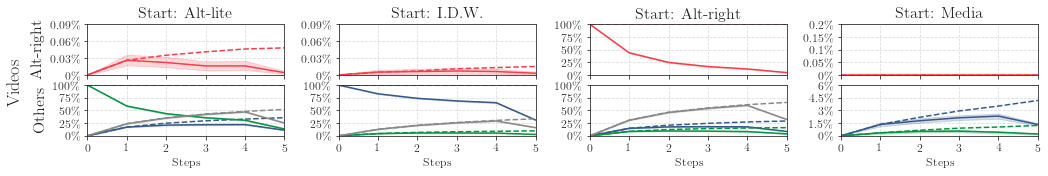

In [23]:
fig = plt.figure(constrained_layout=False, figsize=(16.5,2))
gs = fig.add_gridspec(nrows=2, ncols=4, wspace=0.275, hspace=0.2, top=0.9, left=0.1)

axes = [
    fig.add_subplot(gs[0, 0]), 
    fig.add_subplot(gs[0, 1]), 
    fig.add_subplot(gs[0, 2]), 
    fig.add_subplot(gs[0, 3])
]

for idx, (ax, tt) in enumerate(list(zip(axes, titles))):
    df_tmp = df[df["Starting"] == tt]
    ax.plot(list(range(6)), c["Alt-right", tt].mean(axis=0), "--", color=colors["Alt-right"])
    sns.lineplot(x="step", y="isar", data=df_tmp, color=colors["Alt-right"], ax=ax)
    ax.set_ylim([0, 0.006])
    ax.set_xticks(list(range(6)))
    ax.set_xlim([0,5])
    ax.set_yticks([0, 0.003, 0.006, 0.009])
    ax.xaxis.grid(color='#DCDCDC', linestyle='dashed')
    ax.yaxis.grid(color='#DCDCDC', linestyle='dashed')
    ax.set_title("Start: " + tt.replace("Control", "Media"))
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_yticklabels(["0\%", "0.03\%", "0.06\%", "0.09\%"])
    ax.set_xticklabels([])
    
    if idx == 0:
      ax.set_ylabel("Alt-right", fontsize=16, labelpad=5)

axes[-1].set_ylim([0, 0.002])
axes[-1].set_yticks([0, 0.0005, 0.001, 0.0015, 0.002])
axes[-1].set_yticklabels(["0\%", "0.05\%", "0.1\%", "0.15\%", "0.2\%"])

axes[-2].set_ylim([0, 1])
axes[-2].set_yticks([0, 0.25, 0.5, 0.75, 1])
axes[-2].set_yticklabels(["0\%", "25\%", "50\%", "75\%", "100\%"])

axes = [
    fig.add_subplot(gs[1, 0]), 
    fig.add_subplot(gs[1, 1]), 
    fig.add_subplot(gs[1, 2]), 
    fig.add_subplot(gs[1, 3])
]

for idx, (ax, tt) in enumerate(list(zip(axes, titles))):
    df_tmp = df[df["Starting"] == tt]
    ax.plot(list(range(6)), c["Intellectual Dark Web", tt].mean(axis=0), "--", 
            color=colors["Intellectual Dark Web"])
    sns.lineplot(x="step", y="isidw", data=df_tmp, color=colors["Intellectual Dark Web"], ax=ax)
    
    ax.plot(list(range(6)), c["Alt-lite", tt].mean(axis=0), "--", 
            color=colors["Alt-lite"])
    sns.lineplot(x="step", y="isal", data=df_tmp, color=colors["Alt-lite"], ax=ax)
    
    ax.plot(list(range(6)), c["Control", tt].mean(axis=0), "--", 
            color=colors["Control"])
    sns.lineplot(x="step", y="isctrl", data=df_tmp, color=colors["Control"], ax=ax)
    ax.set_ylim([0, 1])
    ax.set_xticks(list(range(6)))
    ax.set_xlim([0,5])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.xaxis.grid(color='#DCDCDC', linestyle='dashed')
    ax.yaxis.grid(color='#DCDCDC', linestyle='dashed')
    ax.set_ylabel("")
    ax.set_title("")
    ax.set_xlabel("Steps")
    ax.set_yticklabels(["0\%", "25\%", "50\%", "75\%", "100\%"])

axes[0].set_ylabel("Others", fontsize=16)
axes[-1].set_ylim([0, 0.06])
axes[-1].set_yticks([0, 0.015, 0.03, 0.045, 0.06])
axes[-1].set_yticklabels(["0\%", "1.5\%", "3\%", "4.5\%", "6\%"])
fig.text(0.04, 0.5, 'Videos', va='center', ha='center', rotation='vertical', fontsize=18)

fig.savefig("../imgs/video_graphs.pdf", bbox_inches='tight')
fig.savefig("../imgs/video_graphs.png", bbox_inches='tight')

In [8]:
# old graph!

# ax_graph = fig.add_subplot(gs[0:4, 0:2])
# pos = {k: np.array([i["x"], i["y"]]) for k, i in df_helper_pos[["x", "y"]].iterrows()}

# edges = G.edges()
# weights = [np.power(G[u][v]['pct'],0.25)*5 for u,v in edges]
# node_color = [ cl.hex2color(colors[n["category"]]) for _, n in G.nodes(data=True)]
# nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, ax=ax_graph, node_size=150)
# nodes.set_edgecolor("#111111")
# edge_color = [ cl.to_rgba(cl.hex2color(colors[G.nodes[n]["category"]]), alpha=0.05) 
#               if G.nodes[n]["category"] == "Alt-right" 
#               else  cl.to_rgba(cl.hex2color(colors[G.nodes[n]["category"]]), alpha=0.015) 
#               for _, n in G.edges()]
# nodes = nx.draw_networkx_edges(G, pos, width=weights, ax=ax_graph, 
#                                edge_color=edge_color, alpha=0.1)
# ax_graph.set_axis_off()
# ax_graph.set_title("Video Recommendation", size=16)

# ax_graph.text(-250, -1200, helper_edges_count[("Alt-right", "Alt-right")], 
#               horizontalalignment="center",  verticalalignment="center", fontsize=18, rotation=0,
#              color=colors["Alt-right"])

# ax_graph.text(+2140, -1220,  helper_edges_count[("Intellectual Dark Web", "Intellectual Dark Web")], 
#               horizontalalignment="center",  verticalalignment="center", fontsize=18, rotation=0,
#              color=colors["Intellectual Dark Web"])

# ax_graph.text(+1500, +900, helper_edges_count[("Alt-lite", "Alt-lite")], 
#               horizontalalignment="center",  verticalalignment="center", fontsize=18, rotation=0,
#              color=colors["Alt-lite"])

# ax_graph.text(+1700, +250, r'$\rightarrow$ ' + helper_edges_count[("Alt-lite", "Intellectual Dark Web")],
#               horizontalalignment="center",  verticalalignment="center", fontsize=18, rotation=315,
#              color=colors["Alt-lite"])

# ax_graph.text(+1800, +350, helper_edges_count[("Intellectual Dark Web", "Alt-lite")] + r'$\leftarrow$',
#               horizontalalignment="center",  verticalalignment="center", fontsize=18, rotation=315,
#              color=colors["Intellectual Dark Web"])

# ax_graph.text(150, +200, r'$\rightarrow$ ' + helper_edges_count[("Alt-right", "Alt-lite")],
#               horizontalalignment="center",  verticalalignment="center", fontsize=18, rotation=47.5,
#              color=colors["Alt-right"])

# ax_graph.text(50, +300,helper_edges_count[("Alt-lite", "Alt-right")] + r'$\leftarrow$',
#               horizontalalignment="center",  verticalalignment="center", fontsize=18, rotation=47.5,
#              color=colors["Alt-lite"])

# ax_graph.text(+950, -1200,  r'$\rightarrow$ ' + helper_edges_count[("Alt-right", "Intellectual Dark Web")],
#               horizontalalignment="center",  verticalalignment="center", fontsize=18, rotation=0,
#              color=colors["Alt-right"])
# ax_graph.text(+950, -1375, helper_edges_count[("Intellectual Dark Web", "Alt-right")] + r'$\leftarrow$',
#               horizontalalignment="center",  verticalalignment="center", fontsize=18, rotation=0,
#              color=colors["Intellectual Dark Web"])

In [103]:
k = "Alt-right" 
v = [{ "src":  df_sources.loc[i, "Category"], "dst":k, "tmp":tmp["pct"]} for i, j, tmp in G.edges(data=True) 
 if j != "Other" and df_sources.loc[j, "Category"] == "Alt-right"]

df_v  = pd.DataFrame(v)
df_vg = df_v.groupby(["src", "dst"]).sum()
df_vg["tmp"] = df_vg["tmp"]/df_vg["tmp"].values.sum() 
df_vg

,,tmp
src,dst,
Alt-lite,Alt-lite,0.854084
Alt-right,Alt-lite,0.057216
Control,Alt-lite,0.003271
Intellectual Dark Web,Alt-lite,0.085429


In [104]:
i_cat = "Alt-lite" 
v = [{ "src":  df_sources.loc[i, "Category"], "dst": df_sources.loc[j, "Category"], "tmp":tmp["pct"]} for i, j, tmp in G.edges(data=True) 
 if j != "Other" and df_sources.loc[i, "Category"] == i_cat]

df_v  = pd.DataFrame(v)
df_vg = df_v.groupby(["src", "dst"]).sum()
df_vg["tmp"] = df_vg["tmp"]/df_vg["tmp"].values.sum() 
df_vg

tmp
src      dst                            
Alt-lite Alt-lite               0.682118
         Alt-right              0.007183
         Control                0.178233
         Intellectual Dark Web  0.132466

In [91]:
df_vg

,,dummy,tmp
src,dst,,
Alt-lite,Alt-right,0.351145,0.020668
Alt-right,Alt-right,0.487459,0.975700
Control,Alt-right,0.051254,0.000147
Intellectual Dark Web,Alt-right,0.110142,0.003485
